In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ndmnh/ct2024-ds-hw2-p4/main/weather.csv')

### Part A

In [3]:
df['Ftemp'] = (df['Ktemp'] - 273.15) * 9/5 + 32

In [4]:
df['Ftemp']

0        34.245212
1        39.066674
2        45.771620
3        57.182180
4        54.504716
           ...    
26293    38.058440
26294    38.909300
26295    42.241550
26296    44.140640
26297    47.198030
Name: Ftemp, Length: 26298, dtype: float64

In [5]:
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

In [6]:
monthly_avg = df.groupby(['year', 'month'])['Ftemp'].mean().reset_index()

In [7]:
# Define a plotting function
def plot_yearly_temps(year):
    plt.figure(figsize=(10, 6))
    yearly_data = monthly_avg[monthly_avg['year'] == year]
    plt.plot(yearly_data['month'], yearly_data['Ftemp'], marker='o')
    plt.title(f'Average Monthly Temperature in {year}')
    plt.xlabel('Month')
    plt.ylabel('Temperature (F)')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.show()

# Create an interactive widget
years = monthly_avg['year'].unique()
interact(plot_yearly_temps, year=widgets.IntSlider(min=years.min(), max=years.max(), step=1, value=years.min()))


interactive(children=(IntSlider(value=1950, description='year', max=2021, min=1950), Output()), _dom_classes=(…

<function __main__.plot_yearly_temps(year)>

Instructions on how to run interactive visualization graph:

Go to this link and wait till environment finishes building to see this very Jupyter notebook hosted publicly https://notebooks.gesis.org/binder/jupyter/user/ndmnh-ct2024-ds-hw2-p4-cinwvja3/doc/tree/q4.ipynb

Run all the cell up until the cell above this one to see the interactive diagram (with the slider) showing up.

### Part B

In [16]:
yearly_avg_temp = df.groupby('year')['Ftemp'].mean().reset_index(name='avg_temp')

yearly_avg_temp

,year,avg_temp
0,1950,52.776070
1,1951,53.822162
2,1952,54.372742
3,1953,55.295208
4,1954,53.463150
...,...,...
67,2017,55.456930
68,2018,54.944623
69,2019,54.809348
70,2020,56.145076


In [17]:
first_year_above_55 = yearly_avg_temp[yearly_avg_temp['avg_temp'] > 55].head(1)

first_year_above_55

,year,avg_temp
3,1953,55.295208


so the year was 1953

### Part C

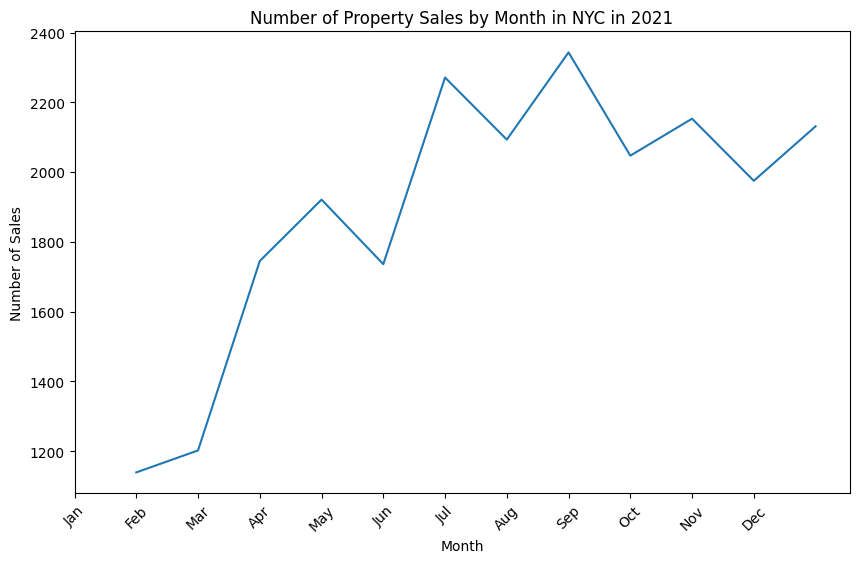

In [3]:
sales_df = pd.read_csv('https://raw.githubusercontent.com/ndmnh/ct2024-ds-hw2-p4/main/2021_manhattan.csv')
sales_df['sale_date'] = pd.to_datetime(sales_df['SALE DATE'])
sales_df['month'] = sales_df['sale_date'].dt.month
monthly_sales = sales_df.groupby('month').size()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line')
plt.title('Number of Property Sales by Month in NYC in 2021')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

I used the property sales dataset in Manhattan in 2021 from https://www.nyc.gov/site/finance/property/property-annualized-sales-update.page

The positive correlation between rising temperatures and increased sales of property can be attributed to several factors that influence buyer behavior and market dynamics.

#### Improved Market Sentiment in Warmer Months
Generally, real estate markets tend to be more active during warmer months. This is partly due to better weather conditions, making it more convenient for buyers to attend open houses and inspections (warmer weather, longer daylight hours). Additionally, families prefer to move during the summer to avoid disrupting the school year.

#### Economic Activity and Seasonality
Warmer periods often coincide with economic upticks in many areas due to seasonal employment, tourism, and consumer spending. This increase in economic activity can boost buyer confidence and purchasing power, leading to more property transactions.

#### Development and Construction Cycles
Construction and development projects often ramp up during warmer months due to favorable working conditions. The completion of new homes and commercial properties can increase inventory and stimulate market activity, contributing to more sales.